## **Simple CNN Implemented using Keras.**

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

In [3]:
# Load a sample dataset (MNIST for simplicity)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# Normalize and reshape data
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = np.expand_dims(x_train, axis=-1) # Add channel dimension
x_test = np.expand_dims(x_test, axis=-1)

In [5]:
# Define a simple CNN model
model = keras.Sequential([
  layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(64, (3, 3), activation="relu"),
  layers.MaxPooling2D((2, 2)),
  layers.Flatten(),
  layers.Dense(128, activation="relu"),
  layers.Dense(10, activation="softmax") # 10 classes for MNIST digits
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Compile the model
model.compile(optimizer="adam",

  loss="sparse_categorical_crossentropy",
  metrics=["accuracy"])

In [7]:
# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 31ms/step - accuracy: 0.9132 - loss: 0.2916 - val_accuracy: 0.9857 - val_loss: 0.0444
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 0.9863 - loss: 0.0450 - val_accuracy: 0.9904 - val_loss: 0.0308
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 31ms/step - accuracy: 0.9910 - loss: 0.0270 - val_accuracy: 0.9865 - val_loss: 0.0361
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 30ms/step - accuracy: 0.9936 - loss: 0.0219 - val_accuracy: 0.9906 - val_loss: 0.0299
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 31ms/step - accuracy: 0.9959 - loss: 0.0142 - val_accuracy: 0.9878 - val_loss: 0.0413


In [8]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9840 - loss: 0.0537
Test accuracy: 0.9878


In [9]:
# Make predictions
predictions = model.predict(x_test[:5])
predicted_labels = np.argmax(predictions, axis=1)
print("Predicted labels:", predicted_labels)
print("Actual labels: ", y_test[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
Predicted labels: [7 2 1 0 4]
Actual labels:  [7 2 1 0 4]


## **Task 1: Data Understanding and Visualization:**

In [10]:
import zipfile

In [11]:
file_path = '/content/FruitinAmazon.zip'

In [12]:
with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/FruitinAmazon')

In [13]:
# Define paths
train_dir = '/content/FruitinAmazon/FruitinAmazon/train'
test_dir = '/content/FruitinAmazon/FruitinAmazon/test'

1. Load and visualize images from a dataset stored in directories, where each subdirec-
tory represents a class. You are expected to write a code:

*   Get the list of class directories from the train folder.
*   Select one image randomly from each class.
*   Display the images in a grid format with two rows using matplotlib.

In [14]:
import os
import random
import matplotlib.pyplot as plt

def visualize_data(train_data_dir):
    # Get the list of class directories
    class_dirs = [d for d in os.listdir(train_data_dir) ]
    print(class_dirs)

    # Select one image randomly from each class
    images = []
    labels = []
    for class_dir in class_dirs:
        class_path = os.path.join(train_data_dir, class_dir)
        image_files = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]
        random_image_file = random.choice(image_files)
        image_path = os.path.join(class_path, random_image_file)
        images.append(plt.imread(image_path))
        labels.append(class_dir)

    # Display the images in a grid format with two rows using matplotlib
    fig, axes = plt.subplots(2, len(class_dirs) // 2, figsize=(12, 6))
    for i, (image, label) in enumerate(zip(images, labels)):
        row = i // (len(class_dirs) // 2)
        col = i % (len(class_dirs) // 2)
        axes[row, col].imshow(image)
        axes[row, col].set_title(label)
        axes[row, col].axis('off')

    plt.tight_layout()
    plt.show()

['guarana', 'cupuacu', 'graviola', 'tucuma', 'acai', 'pupunha']


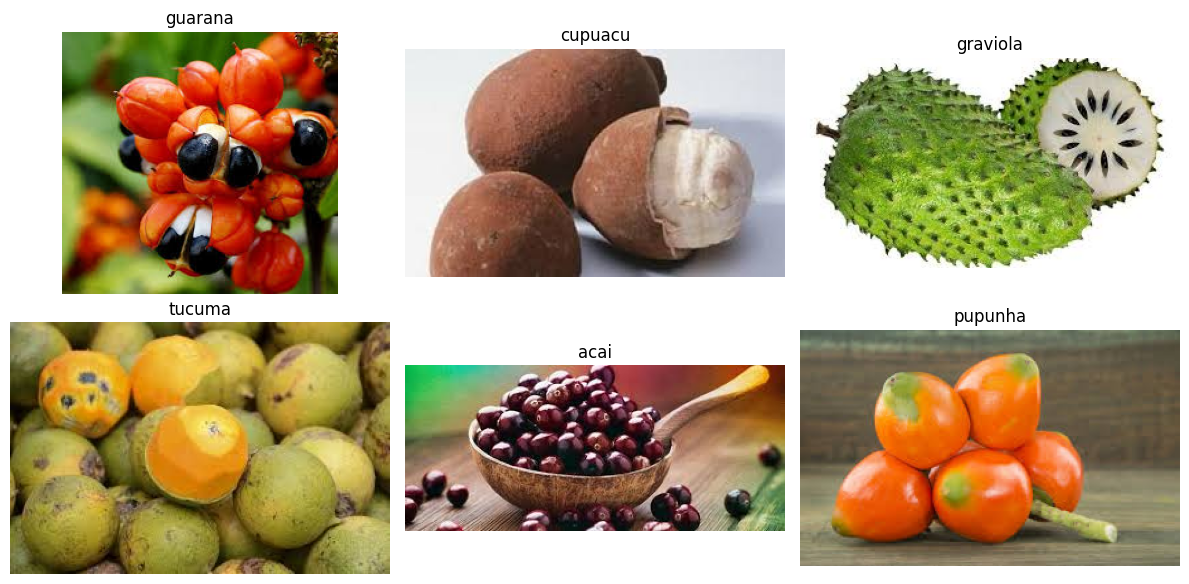

In [15]:
visualize_data(train_dir)

2. Check for Corrupted Image: Write a script that verifies whether the image in the train
directory are valid. If any corrupted images are found, the script must remove the image from
the directory and print the message which image have been removed, if none found print ”No Corrupted Images Found.”

Hint:
- Iterate through each class subdirectory and check if each image is valid.
- Use the Image.open() function to attempt to load each image.
- If the image is corrupted i.e. raises an IOError or SyntaxError, remove the image from the directory and print f"Removed corrupted image: {image_path}".
- Maintain a list of all corrupted image paths for reporting.

Expected Output: No corrupted images found.

In [16]:
import os
from PIL import Image

def check_and_remove_corrupted_images(train_folder):
    corrupted_images = []
    for class_dir in os.listdir(train_folder):
        class_path = os.path.join(train_folder, class_dir)
        if os.path.isdir(class_path):
            for image_file in os.listdir(class_path):
                image_path = os.path.join(class_path, image_file)
                try:
                    with Image.open(image_path) as img:
                        # Verify image format
                        img.verify()
                except (IOError, SyntaxError) as e:
                    corrupted_images.append(image_path)
                    os.remove(image_path)
                    print(f"Removed corrupted image: {image_path}")

    if not corrupted_images:
        print("No corrupted images found.")
    else:
        print(f"Total corrupted images removed: {len(corrupted_images)}")


check_and_remove_corrupted_images(train_dir)

No corrupted images found.


## **Task 2: Loading and Preprocessing Image Data in keras:**

In [17]:
import tensorflow as tf
# Define image size and batch size
img_height = 128
img_width = 128
batch_size = 32
validation_split = 0.2  # 80% training, 20% validation

# Create a preprocessing layer for normalization
rescale = tf.keras.layers.Rescaling(1./255)  # Normalize pixel values to [0, 1]

# Create training dataset with normalization
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=True,
    validation_split=validation_split,
    subset='training',
    seed=123
)

# Apply the normalization (Rescaling) to the dataset
train_ds = train_ds.map(lambda x, y: (rescale(x), y))

# Create validation dataset with normalization
val_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False,
    validation_split=validation_split,
    subset='validation',
    seed=123
)

# Apply the normalization (Rescaling) to the validation dataset
val_ds = val_ds.map(lambda x, y: (rescale(x), y))

Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.


## **Task 3 - Implement a CNN with**

Follow the following Structure and Hyper - parameters:

Convolutional Architecture:

* Convolutional Layer 1:
 - Filter Size (F): (3, 3)
 - Number of Filters (k): 32
 - Padding (P): same
 - Stride (s): 1
* Activation Layer: ReLU activation
* Pooling Layer 1: Max pooling
 - Filter Size (F): (2, 2)
 - Stride (s): 2
* Convolutional Layer 2:
 - Filter Size (F): (3, 3)
 - Number of Filters (k): 32
 - Padding (P): same
 - Stride (s): 1
* Activation Layer: ReLU activation
* Pooling Layer 2: Max pooling
  - Filter Size (F): (2, 2)
  - Stride (s): 2

Fully Connected Network Architecture:
* Flatten Layer: Flatten the input coming from the convolutional layers
* Input Layer:
* Hidden Layer - 2:
  - Number of Neurons: 64
  - Number of Neurons: 128
* Output Layer:
  - Number of Neurons: num classes (number of output classes)

In [18]:
model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(img_height, img_width, 3)),
      tf.keras.layers.MaxPooling2D((2, 2)),
      tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
      tf.keras.layers.MaxPooling2D((2, 2)),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(6, activation='softmax') # 6 for 6 classes of fruits
])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │       2,097,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,116,454 (8.07 MB)

 Trainable params: 2,116,454 (8.07 MB)

 Non-trainable params: 0 (0.00 B)

## **Task 4: Compile the Model**

**Model Compilation**

* Choose an appropriate optimizer (e.g., Adam), loss function (e.g., sparse categorical crossentropy),
and evaluation metric (e.g., accuracy).

In [19]:
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │       2,097,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,116,454 (8.07 MB)

 Trainable params: 2,116,454 (8.07 MB)

 Non-trainable params: 0 (0.00 B)

## **Task 4: Train the Model**

Model Training

* Use the model.fit() function to train the model. Set the batch size to 16 and the number of epochs
to 250.
* Use val ds for validation.

* Use callbacks such as ModelCheckpoint and EarlyStopping for saving the best model and avoid-
ing overfitting.

In [20]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Define callbacks
callbacks = [
    ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, mode='min', verbose=1),
    EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
]

# Train the model
history = model.fit(
    train_ds,
    epochs=250,
    batch_size=16,
    validation_data=val_ds,  # Use val_ds for validation
    callbacks=callbacks  # Use callbacks
)


Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 659ms/step - accuracy: 0.1858 - loss: 2.1072
Epoch 1: val_loss improved from inf to 1.75706, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 986ms/step - accuracy: 0.1810 - loss: 2.1452 - val_accuracy: 0.0000e+00 - val_loss: 1.7571
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step - accuracy: 0.1742 - loss: 1.7664
Epoch 2: val_loss did not improve from 1.75706
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 485ms/step - accuracy: 0.1793 - loss: 1.7660 - val_accuracy: 0.0556 - val_loss: 1.8619
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step - accuracy: 0.2488 - loss: 1.6407
Epoch 3: val_loss improved from 1.75706 to 1.71564, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 482ms/step - accuracy: 0.2561 - loss: 1.6310 - val_accuracy: 0.2778 - val_loss: 1.7156
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step - accuracy: 0.2986 - loss: 1.5549
Epoch 4: val_loss improved from 1.71564 to 1.36088, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 495ms/step - accuracy: 0.3073 - loss: 1.5458 - val_accuracy: 0.7222 - val_loss: 1.3609
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step - accuracy: 0.3993 - loss: 1.3781
Epoch 5: val_loss improved from 1.36088 to 1.21853, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 510ms/step - accuracy: 0.4036 - loss: 1.3708 - val_accuracy: 0.6667 - val_loss: 1.2185
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step - accuracy: 0.4855 - loss: 1.2410
Epoch 6: val_loss improved from 1.21853 to 0.97383, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 489ms/step - accuracy: 0.4822 - loss: 1.2409 - val_accuracy: 0.8333 - val_loss: 0.9738
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step - accuracy: 0.6505 - loss: 1.0383
Epoch 7: val_loss did not improve from 0.97383
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 567ms/step - accuracy: 0.6476 - loss: 1.0391 - val_accuracy: 0.7778 - val_loss: 1.0982
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step - accuracy: 0.8050 - loss: 0.8533
Epoch 8: val_loss improved from 0.97383 to 0.76739, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 494ms/step - accuracy: 0.8051 - loss: 0.8469 - val_accuracy: 0.8889 - val_loss: 0.7674
Epoch 9/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step - accuracy: 0.9115 - loss: 0.5868
Epoch 9: val_loss improved from 0.76739 to 0.66993, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 466ms/step - accuracy: 0.9023 - loss: 0.5926 - val_accuracy: 0.8889 - val_loss: 0.6699
Epoch 10/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step - accuracy: 0.9155 - loss: 0.4348
Epoch 10: val_loss did not improve from 0.66993
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 442ms/step - accuracy: 0.9123 - loss: 0.4369 - val_accuracy: 0.7222 - val_loss: 0.7263
Epoch 11/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step - accuracy: 0.9601 - loss: 0.2916
Epoch 11: val_loss did not improve from 0.66993
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 446ms/step - accuracy: 0.9596 - loss: 0.2851 - val_accuracy: 0.8333 - val_loss: 0.8120
Epoch 12/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step - accuracy: 0.9601 - loss: 0.2361
Epoch 12: val_loss improved from 0.66993 to 0.40224, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 503ms/step - accuracy: 0.9596 - loss: 0.2304 - val_accuracy: 0.8333 - val_loss: 0.4022
Epoch 13/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 642ms/step - accuracy: 0.9653 - loss: 0.1211
Epoch 13: val_loss did not improve from 0.40224
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 817ms/step - accuracy: 0.9635 - loss: 0.1212 - val_accuracy: 0.7778 - val_loss: 0.7465
Epoch 14/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step - accuracy: 0.9797 - loss: 0.1141
Epoch 14: val_loss did not improve from 0.40224
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 443ms/step - accuracy: 0.9813 - loss: 0.1113 - val_accuracy: 0.8333 - val_loss: 0.7284
Epoch 15/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step - accuracy: 1.0000 - loss: 0.0437
Epoch 15: val_loss did not improve from 0.40224
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 431ms/step - accuracy: 1.0000 - loss: 0.0428 - val_accuracy: 0.8333 - val_loss: 0.4624
Epoch 16/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step - accuracy: 1.0000 - loss: 0.0412
Epoch 16: val_loss improved from 0.40224 to 0.26258,

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 498ms/step - accuracy: 1.0000 - loss: 0.0393 - val_accuracy: 0.8889 - val_loss: 0.2626
Epoch 17/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step - accuracy: 1.0000 - loss: 0.0295
Epoch 17: val_loss did not improve from 0.26258
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 458ms/step - accuracy: 1.0000 - loss: 0.0296 - val_accuracy: 0.8333 - val_loss: 0.4004
Epoch 18/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step - accuracy: 1.0000 - loss: 0.0063
Epoch 18: val_loss did not improve from 0.26258
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 451ms/step - accuracy: 1.0000 - loss: 0.0065 - val_accuracy: 0.8333 - val_loss: 0.5797
Epoch 19/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step - accuracy: 1.0000 - loss: 0.0066
Epoch 19: val_loss did not improve from 0.26258
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 808ms/step - accuracy: 1.0000 - loss: 0.0065 - val_accuracy: 0.8333 - val_loss: 0.4881
Epoch 20/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 1.0000 - loss: 0.0064
Epoch 20: val_loss did not improve from 0.26258
3/3 ━━━

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 580ms/step - accuracy: 1.0000 - loss: 0.0028 - val_accuracy: 0.9444 - val_loss: 0.2577
Epoch 23/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step - accuracy: 1.0000 - loss: 0.0016
Epoch 23: val_loss improved from 0.25769 to 0.25615, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 500ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 0.8889 - val_loss: 0.2561
Epoch 24/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 649ms/step - accuracy: 1.0000 - loss: 0.0013
Epoch 24: val_loss did not improve from 0.25615
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 770ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 0.8889 - val_loss: 0.2886
Epoch 25/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step - accuracy: 1.0000 - loss: 8.0928e-04
Epoch 25: val_loss did not improve from 0.25615
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 521ms/step - accuracy: 1.0000 - loss: 8.1103e-04 - val_accuracy: 0.8889 - val_loss: 0.3201
Epoch 26/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step - accuracy: 1.0000 - loss: 6.2366e-04
Epoch 26: val_loss did not improve from 0.25615
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 441ms/step - accuracy: 1.0000 - loss: 6.4870e-04 - val_accuracy: 0.8889 - val_loss: 0.3535
Epoch 27/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step - accuracy: 1.0000 - loss: 6.9572e-04
Epoch 27: val_loss did not impro

## **Task 5: Evaluate the Model**

**Model Evaluation**

* After training, evaluate the model using model.evaluate() on the test set to check the test accuracy and loss.

In [21]:
# Create test dataset with normalization
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False  # Important to keep test data in original order
)

# Apply the normalization (Rescaling) to the test dataset
test_ds = test_ds.map(lambda x, y: (rescale(x), y))

Found 30 files belonging to 6 classes.


In [22]:
# Evaluate the model on the test dataset
loss, accuracy = model.evaluate(test_ds)

print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step - accuracy: 0.7000 - loss: 0.8513
Test Loss: 0.8512519598007202
Test Accuracy: 0.699999988079071


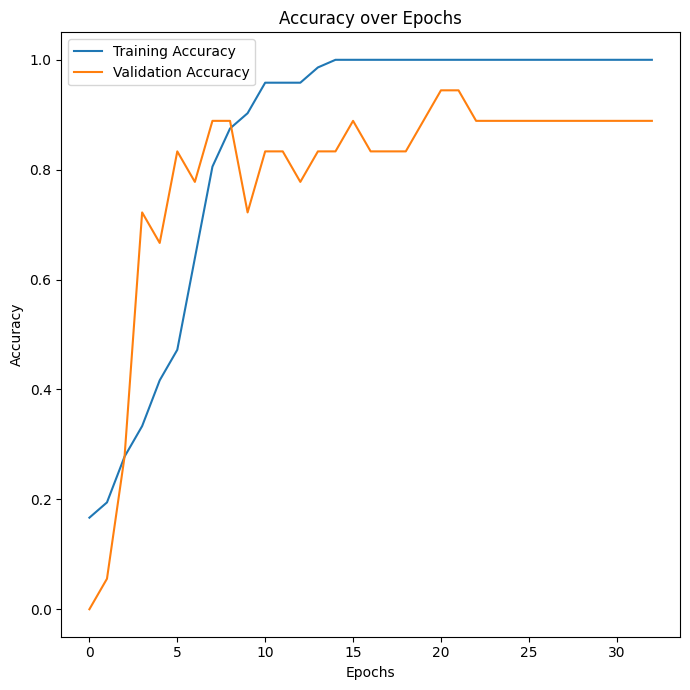

In [23]:
# Plot training and validation accuracy
plt.figure(figsize=(7, 7))
# Accuracy plot

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

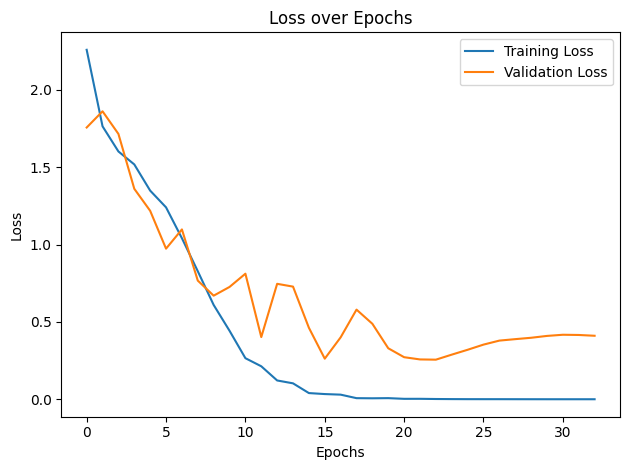

In [24]:
# Loss plot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## **Task 6: Save and Load the Model**

**Model Saving and Loading**

* Save the trained model to an .h5 file using model.save().
* Load the saved model and re-evaluate its performance on the test set.

1. Save The model

In [25]:
# Save the trained model to an .h5 file
model.save('my_fruit_model.h5')

2. Load the Model

In [26]:
# Load the saved model
loaded_model = tf.keras.models.load_model('my_fruit_model.h5')

# Re-evaluate the model on the test dataset
loss, accuracy = loaded_model.evaluate(test_ds)

print('Test Loss (Loaded Model):', loss)
print('Test Accuracy (Loaded Model):', accuracy)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step - accuracy: 0.7000 - loss: 0.8513
Test Loss (Loaded Model): 0.8512519598007202
Test Accuracy (Loaded Model): 0.699999988079071


## **Task 7: Predictions and Classification Report**

Making Predictions

* Use model.predict() to make predictions on test images.
* Convert the model’s predicted probabilities to digit labels using np.argmax().
* Also use from sklearn.metrics import classification report to report the Classification
Report of your Model Performance.

In [27]:
import numpy as np
from sklearn.metrics import classification_report

# Make predictions
predictions = model.predict(test_ds)

# Convert probabilities to digit labels
predicted_labels = np.argmax(predictions, axis=1)

# Get true labels from the test dataset
true_labels = []
for images, labels in test_ds.unbatch():  # Unbatch the dataset to get individual labels
    true_labels.append(labels.numpy())  # Use append instead of extend

# Generate classification report
report = classification_report(true_labels, predicted_labels)
print(report)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step
              precision    recall  f1-score   support

           0       0.57      0.80      0.67         5
           1       0.60      0.60      0.60         5
           2       0.83      1.00      0.91         5
           3       0.75      0.60      0.67         5
           4       0.80      0.80      0.80         5
           5       0.67      0.40      0.50         5

    accuracy                           0.70        30
   macro avg       0.70      0.70      0.69        30
weighted avg       0.70      0.70      0.69        30

